# Blending Images

`addWeighted()` combines two images by taking the same pixel from both images and creating the resulting pixel as their weighted sum: 

`result_pixel = alpha * pixel_1 + beta * pixel_2 + gamma`

NOTE: It works only for the images of the same size.

In [23]:
import cv2

In [24]:
img1 = cv2.imread('../data/dog_backpack.png') # OpenCV reads images as BGR
print(type(img1))
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../data/watermark_no_copy.png')
print(type(img2))
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [25]:
import matplotlib.pyplot as plt

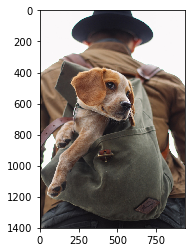

In [26]:
plt.imshow(img1)

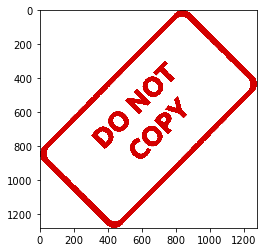

In [27]:
plt.imshow(img2)

Let's check dimensions of both images (remember that `shape` returns `height x width x colors`):

In [28]:
print(f'img1.shape = {img1.shape}')

img1.shape = (1401, 934, 3)


In [29]:
print(f'img2.shape = {img2.shape}')

img2.shape = (1280, 1277, 3)


Let's resize these images so they are equal to each other and let them be 1200x1200 (once they are of the same size we won't need to create a mask):

In [30]:
img1_1200x1200 = cv2.resize(img1, (1200, 1200))
img2_1200x1200 = cv2.resize(img2, (1200, 1200))

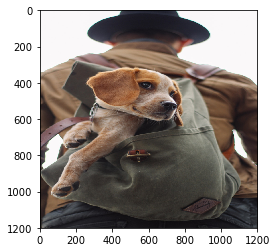

In [31]:
# After this, the images look a bit distorted
plt.imshow(img1_1200x1200)

## Blending Images of same size

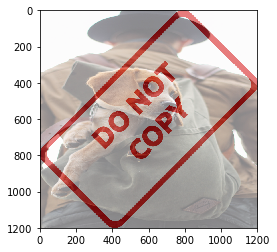

In [32]:
blended = cv2.addWeighted(src1=img1_1200x1200, alpha=0.5, src2=img2_1200x1200, beta=0.5, gamma=0)
plt.imshow(blended)

To make one image more prominent, we can increase its `alpha` and decrease it for the other image:

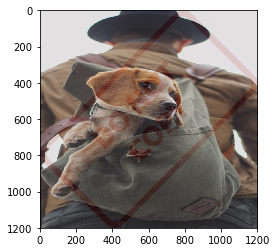

In [33]:
blended = cv2.addWeighted(src1=img1_1200x1200, alpha=0.8, src2=img2_1200x1200, beta=0.1, gamma=0)
plt.imshow(blended)

## Overlay small image on the top of larger image (no blending; NumPy reassignment)

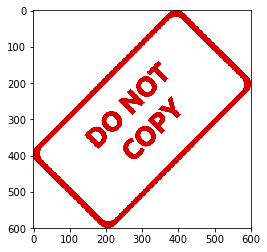

In [35]:
img2_600x600 = cv2.resize(img2, (600, 600)) # this is a small image
plt.imshow(img2_600x600)

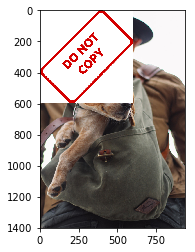

In [36]:
# these are the coordinates where we want to place small image within the large image
# Let's first place smaller image in the top left corner of the large image
x_offset = 0
y_offset = 0

# where do we want to end the slice
# x axis: add the small image length to the x coordinate of the starting point
x_end = x_offset + img2_600x600.shape[1] 
# y axis: add the small image height to the y coordinate of the starting point
y_end = y_offset + img2_600x600.shape[0] 

# now when we know the coordinates of the area of the large image that will be replaced with smaller image, we can just do ndarray rassignment:
img1[y_offset:y_end, x_offset:x_end] = img2_600x600

plt.imshow(img1)